In [2]:
import coffea
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import numpy as np
from coffea import hist

In [3]:
import matplotlib.pyplot as plt

In [4]:
import uproot

In [5]:
def getGen(f):
    events = NanoEventsFactory.from_root(f,schemaclass=NanoAODSchema).events()
    return events.GenPart

def unique(a):
    return np.unique(ak.flatten(a,axis=None).to_numpy())

In [35]:
def getWPt(f):
    genPart = getGen(f)
    wpt = genPart[(genPart.status==62)& (abs(genPart.pdgId)==24)].pt 
    return wpt

def getnGenJet(f):
    events = NanoEventsFactory.from_root(f,schemaclass=NanoAODSchema).events()
    GJ = events.GenJet
    GJ_cut = GJ[GJ.pt>15]
    nGenJet = ak.num(GJ_cut,axis=1)
    return nGenJet

In [36]:
events = NanoEventsFactory.from_root("./HNL_mN_5_Ve2_1e-05_NLO/HNL_mN_5_Ve2_1e-05_NLO.root",schemaclass=NanoAODSchema).events()
TwoJet = getGen("./HNL_mN_5_Ve2_1e-05_NLO/HNL_mN_5_Ve2_1e-05_NLO.root")

/uscms/home/kkwok/work/LLP/CMSSW_10_6_20/src/llp_analyzer/coffeaenv/lib/python3.7/site-packages/coffea/nanoevents/schemas/nanoaod.py:196: RuntimeWarning: Missing cross-reference index for Electron_genPartIdx => GenPart
  RuntimeWarning,
/uscms/home/kkwok/work/LLP/CMSSW_10_6_20/src/llp_analyzer/coffeaenv/lib/python3.7/site-packages/coffea/nanoevents/schemas/nanoaod.py:196: RuntimeWarning: Missing cross-reference index for Electron_jetIdx => Jet
  RuntimeWarning,
/uscms/home/kkwok/work/LLP/CMSSW_10_6_20/src/llp_analyzer/coffeaenv/lib/python3.7/site-packages/coffea/nanoevents/schemas/nanoaod.py:196: RuntimeWarning: Missing cross-reference index for Electron_photonIdx => Photon
  RuntimeWarning,
/uscms/home/kkwok/work/LLP/CMSSW_10_6_20/src/llp_analyzer/coffeaenv/lib/python3.7/site-packages/coffea/nanoevents/schemas/nanoaod.py:196: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  RuntimeWarning,
/uscms/home/kkwok/work/LLP/CMSSW_10_6_20/src/llp_analyzer/co

<AxesSubplot:xlabel='nGenJet', ylabel='Count'>

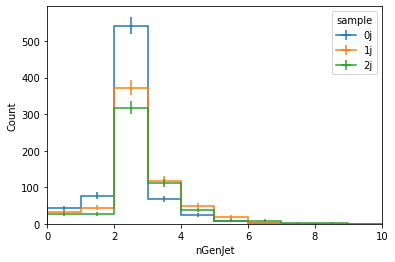

In [37]:
ZeroJet =getnGenJet("./HNL_mN_5_Ve2_1e-05_NLO_0j/HNL_mN_5_Ve2_1e-05_NLO_0j.root")
OneJet = getnGenJet("./HNL_mN_5_Ve2_1e-05_NLO_1j/HNL_mN_5_Ve2_1e-05_NLO_1j_nJMax1.root")
TwoJet = getnGenJet("./HNL_mN_5_Ve2_1e-05_NLO/HNL_mN_5_Ve2_1e-05_NLO.root")

h = hist.Hist("Count",
              hist.Cat("sample","sample"),
              hist.Bin("nGenJet","nGenJet",10,0,10))

h.fill(sample="0j",nGenJet= ZeroJet)
h.fill(sample="1j",nGenJet= OneJet)
h.fill(sample="2j",nGenJet= TwoJet)
hist.plot1d(h)

In [22]:
events.GenJet

<PtEtaPhiMCollectionArray [[{eta: 1.38, ... pt: 31.3}]] type='542 * var * struct...'>

In [13]:
gj = events.GenJet

In [20]:
unique(ak.flatten(gj.partonFlavour))

array([-4, -3, -2, -1,  0,  1,  2,  3,  4,  5, 21], dtype=int32)

In [8]:
TwoJet.fields

['eta',
 'mass',
 'phi',
 'pt',
 'genPartIdxMother',
 'pdgId',
 'status',
 'statusFlags',
 'genPartIdxMotherG',
 'distinctParentIdxG',
 'childrenIdxG',
 'distinctChildrenIdxG']

In [8]:
hnl=TwoJet[TwoJet.pdgId==9900012]

In [56]:
len(hnl)

542

In [36]:
TwoJet[0][617].to_list()

{'childrenIdxG': [620, 621],
 'distinctChildrenIdxG': [621],
 'distinctParentIdxG': 616,
 'eta': 2.84375,
 'genPartIdxMother': 616,
 'genPartIdxMotherG': 616,
 'mass': 0.0,
 'pdgId': -11,
 'phi': 1.830810546875,
 'pt': 0.6347507238388062,
 'status': 23,
 'statusFlags': 22913}

In [79]:
unique(w.distinctChildren.pdgId)

array([    -11,      11,      22, 9900012], dtype=int32)

In [80]:
unique(hnl.distinctChildren.pdgId)

array([-16, -15, -14, -13, -12, -11,  -4,  -3,  -2,  -1,   1,   2,   3,
         4,  11,  12,  13,  14,  15,  16], dtype=int32)

In [74]:
w=TwoJet[abs(TwoJet.pdgId)==24]

In [72]:
hnl.children.pdgId[2]

<Array [[-3, 3, 12]] type='1 * var * ?int32[parameters={"__doc__": "PDG id"}]'>

In [57]:
unique(hnl.distinctChildren.pdgId)

array([-16, -15, -14, -13, -12, -11,  -4,  -3,  -2,  -1,   1,   2,   3,
         4,  11,  12,  13,  14,  15,  16], dtype=int32)

<AxesSubplot:xlabel='pdgId', ylabel='Count'>

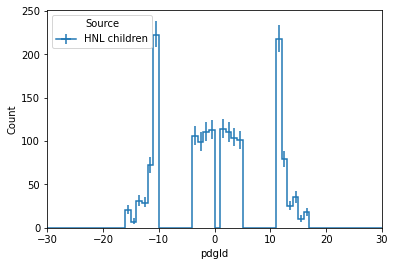

In [9]:
h = hist.Hist("Count",
              hist.Cat("Source","Source"),
              hist.Bin("pdgId","pdgId",60,-30,30))

# h.fill(Source="HNL 2j",pdgId= ak.flatten(hnl.distinctChildren.pdgId,axis=None))
h.fill(Source="HNL children",pdgId= ak.flatten(hnl.children.pdgId,axis=None))
hist.plot1d(h)

In [9]:
gen_W=gen[ak.any(abs(gen.pdgId)==24,axis=1)]

In [ ]:
gen_W[abs(gen_W.pdgId)==24].distinctparent

In [6]:
genFields = [f for f in events.fields if "GenPart" in f]

In [69]:
w = gen[abs(gen.GenPart_pdgId==24)]

In [55]:
np.unique(ak.flatten(events.LHEPart_status).to_numpy())

array([-16, -15,  -4,  -3,  -2,  -1,   1,   2,   3,   4,  15,  16,  21],
      dtype=int32)

In [8]:
gen = ak.zip({k.replace('GenPart_', ''): events[k] for k in genFields})

In [9]:
notW = np.where(ak.any(abs(events.GenPart_pdgId)==24,axis=1)==False)
Wmask = np.where(ak.any(abs(events.GenPart_pdgId)==24,axis=1)==True)
Zmask = np.where(ak.any(events.GenPart_pdgId==23,axis=1)==True)
gen_nonW = gen[notW]
gen_W = gen[Wmask]
gen_Z = gen[Zmask]

In [79]:
gen_nonW[gen_nonW.GenPart_statusFlags==64].GenPart_pdgId

<Array [[], [], [], [], ... [], [], [], []] type='408 * var * int32'>

In [82]:
np.unique(ak.flatten(gen_nonW[gen_nonW.GenPart_statusFlags==64].GenPart_pdgId).to_numpy())

array([-13, -11,  11,  13,  21], dtype=int32)

In [172]:
gen_W

<Array [{run: 1, ... GenVtx_t0: -0.141}] type='967 * {"run": uint32, "luminosity...'>

In [187]:
gen_nonW

<Array [{run: 1, ... GenVtx_t0: -9.42e-05}] type='33 * {"run": uint32, "luminosi...'>

<Record ... 0, 0], GenVtx_t0: -0.0403} type='{"run": uint32, "luminosityBlock": ...'>

In [233]:
h = hist.Hist("Count",
              hist.Cat("cat","type of event"),
              hist.Bin("pdgid","pdgid",60,-30,30))

In [239]:
h.fill(cat="nonW",
    pdgid=ak.flatten(gen_nonW.pdgId))
#     pdgid=ak.flatten(gen_nonW[gen_nonW.status==1].pdgId))

h.fill(cat="W",
    pdgid=ak.flatten(gen_W.pdgId))
h.fill(cat="Z",
    pdgid=ak.flatten(gen_Z.pdgId))


#     pdgid=ak.flatten(gen_W[gen_W.status==1].pdgId))
# h.fill(cat="Z",
#     pdgid=ak.flatten(events[Zmask].GenPart_pdgId))

In [66]:
h = hist.Hist("Count",
              hist.Cat("Source","Source"),
              hist.Bin("pdgId","pdgId",60,-30,30))

h.fill(Source="fast HNL 2j",pdgId= ak.flatten(gen_TwoJet.pdgId))
h.fill(Source="HNL gen",pdgId= ak.flatten(gen_OldSample.pdgId))

(1, 491062.2885843451)

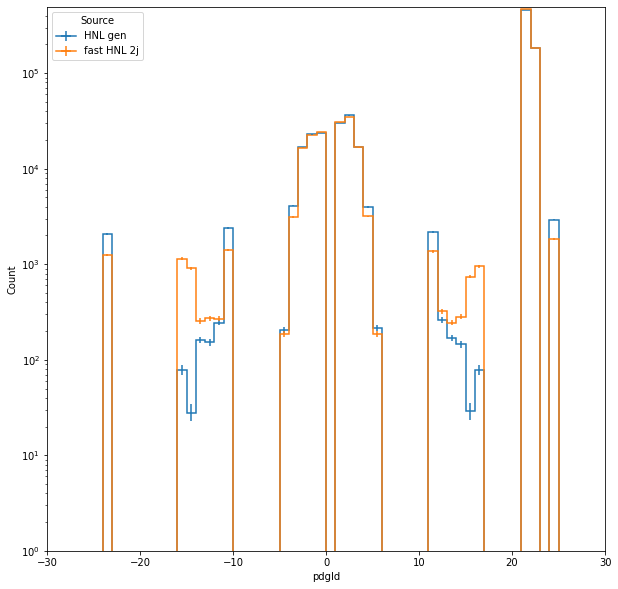

In [68]:
fig, ax = plt.subplots(figsize=(10,10))
hist.plot1d(h,overlay='Source')
ax.set_yscale("log");ax.set_ylim(1,None)
# ax.set_xlim(20,30)
# ax.set_xlim(-30,-20)

In [117]:
np.unique(ak.flatten(events[notW].GenPart_pdgId).to_numpy())

array([ -20313,  -20213,  -10413,  -10411,  -10323,  -10313,  -10311,
         -4322,   -4232,   -4222,   -4214,   -4122,   -4114,   -4112,
         -3334,   -3324,   -3322,   -3314,   -3312,   -3224,   -3222,
         -3214,   -3212,   -3122,   -3114,   -3112,   -2224,   -2214,
         -2212,   -2114,   -2112,   -1114,    -533,    -531,    -523,
          -521,    -513,    -511,    -433,    -431,    -423,    -421,
          -415,    -413,    -411,    -323,    -321,    -315,    -313,
          -311,    -213,    -211,     -24,     -16,     -15,     -14,
           -13,     -12,     -11,      -5,      -4,      -3,      -2,
            -1,       1,       2,       3,       4,       5,      11,
            12,      13,      14,      15,      16,      21,      22,
            23,     111,     113,     130,     211,     213,     221,
           223,     310,     311,     313,     321,     323,     331,
           333,     411,     413,     415,     421,     423,     431,
           433,     

In [113]:
np.unique(ak.flatten(events.LHEPart_status).to_numpy())

array([-1,  1], dtype=int32)

In [110]:
np.unique(ak.flatten(events[notW].LHEPart_pdgId).to_numpy())

array([-16, -15,  -4,  -3,  -2,  -1,   1,   2,   3,   4,  15,  16,  21],
      dtype=int32)

In [193]:
All_parent = gen_W[gen_W.genPartIdxMother]

In [224]:
gen = ak.zip({k.replace('GenPart_', ''): events[k] for k in genFields})

W = gen_W[abs(gen_W.pdgId)==24]
W_parent = gen_W[gen_W[abs(gen_W.pdgId)==24].genPartIdxMother]
W_grandparent = gen_W[W_parent.genPartIdxMother]

In [217]:
gen_W[abs(gen_W.pdgId)==24 &(gen_W.status==21)].genPartIdxMother

<Array [[], [], [], [], ... [], [], [], []] type='967 * var * int32'>

In [223]:
print('W status',np.unique(ak.flatten(W.status).to_numpy()))
print("W parent",np.unique(ak.flatten(W_parent.pdgId).to_numpy()))
print("W grandParent",np.unique(ak.flatten(W_grandparent.pdgId).to_numpy()))

W status [22 44 51 52 62]
W parent [-24  -4  -3  -2  -1   1   2   3   4  21  24]
W grandParent [-24  -4  -3  -2  -1   1   2   3   4  21  24]


In [202]:
W.status

<Array [[22, 62], [22, ... 44, 44, 44, 44, 62]] type='967 * var * int32'>

In [43]:
np.unique(ak.num(gen_OneJet[(gen_OneJet.status)& (abs(gen_OneJet.pdgId)==24)]).to_numpy())

array([0, 1])

In [132]:
ak.flatten(gen_W[(gen_W.status==62) & (abs(gen_W.pdgId)==24)].pt)

<Array [3.32, 2.27, 1.65, ... 5.39, 1.6, 17.7] type='967 * float32'>

In [144]:
ak.flatten(gen_W[(gen_W.status==62) & (abs(gen_W.pdgId)==24)].genPartIdxMother)

<Array [4, 4, 4, 100, 95, ... 70, 4, 231, 94] type='967 * int32'>

In [145]:
np.unique(ak.flatten(gen_W[(abs(gen_W.pdgId)==24) &((gen_W.status==62))].genPartIdxMother).to_numpy())

array([  4,   8,  10,  11,  12,  13,  16,  17,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  79,  80,  81,  82,  83,  84,  85,  86,  88,  89,  91,  93,
        94,  95,  98,  99, 100, 101, 102, 103, 104, 105, 106, 108, 110,
       111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 124, 125, 127,
       128, 129, 130, 132, 133, 135, 136, 137, 138, 139, 140, 143, 144,
       146, 148, 149, 151, 152, 154, 157, 163, 164, 165, 166, 168, 169,
       171, 173, 175, 178, 182, 183, 184, 186, 187, 188, 191, 195, 196,
       197, 199, 203, 205, 207, 208, 209, 210, 214, 215, 216, 217, 223,
       228, 230, 231, 238, 240, 242, 246, 247, 250, 256, 259, 267, 271,
       275, 276, 277, 279, 285, 287, 291, 297, 298, 301, 307, 31

In [296]:
# h.fill(Source="GenPart_pt, status=62",Wpt=ak.flatten(gen_W[(gen_W.status==62) &
#                                                            (abs(gen_W.pdgId)==24)].pt))
# h.fill(Source="GenPart_pt, statusFlag=257",Wpt=ak.flatten(gen_W[(gen_W.statusFlags==257) &
#                                                            (abs(gen_W.pdgId)==24)].pt))
# h.fill(Source="HNL",Wpt=hnl_events.gWPt)
# h.fill(Source="GenPart_pt, status=22",Wpt=ak.flatten(gen_W[gen_W.status==44 & (abs(gen_W.pdgId)==24)].pt))
# h.fill(Source= "LHE_Vpt",Wpt=(events.LHE_Vpt))

In [59]:


# h.fill(Source="GenPart_pt, status=22",Wpt=ak.flatten(gen_W[gen_W.status==44 & (abs(gen_W.pdgId)==24)].pt))
# h.fill(Source= "LHE_Vpt",Wpt=(events.LHE_Vpt))

In [34]:
import mplhep as hep

In [35]:
hep.set_style("CMS")

In [ ]:
ZeroJet =getWPt("./HNL_mN_5_Ve2_1e-05_NLO_0j/HNL_mN_5_Ve2_1e-05_NLO_0j.root")
OneJet = getWPt("./HNL_mN_5_Ve2_1e-05_NLO_1j/HNL_mN_5_Ve2_1e-05_NLO_1j.root")
OneJet_nJmax1 = getWPt("./HNL_mN_5_Ve2_1e-05_NLO_1j/HNL_mN_5_Ve2_1e-05_NLO_1j_nJMax1.root")
TwoJet = getWPt("./HNL_mN_5_Ve2_1e-05_NLO/HNL_mN_5_Ve2_1e-05_NLO.root")
TwoJet_nJmax4 = getWPt("./HNL_mN_5_Ve2_1e-05_NLO/HNL_mN_5_Ve2_1e-05_NLO_nJetMax4.root")

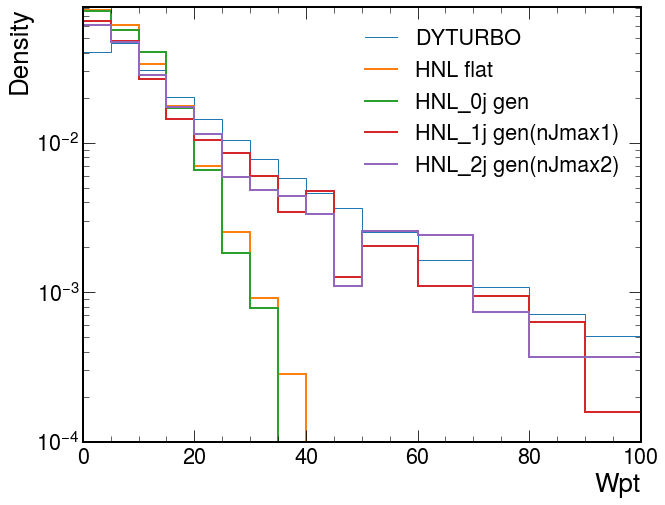

In [37]:
import uproot3 

hnl = uproot.open("/uscms/home/kkwok/eos/llp/HNL/HeavyNeutralLepton_Tree.root")['MuonSystem']

def getLDF(f):
    df = coffea.processor.LazyDataFrame(f)
    return uproot.lazy(df._tree)
    
hnl_events = getLDF(hnl)


f_dyturbo = uproot3.open("../llp_analyzer/dyturbo_cms/wp-13tev-cms.root")
f_LO = uproot3.open("../llp_analyzer/WPT.root")

wp_pt = f_dyturbo['s_qt']
wpt_LO = f_LO['Wpt']

binsize= wp_pt.edges[1:]-wp_pt.edges[:-1]
dyturbo = (wp_pt.values/binsize)/wp_pt.values.sum()
WJetsLNu = (wpt_LO.values/binsize)/wpt_LO.values.sum()

h = hist.Hist("Density",
              hist.Cat("Source","Source"),
              hist.Bin("Wpt","Wpt",wp_pt.edges))



h.fill(Source="HNL flat",Wpt=hnl_events.gWPt)
h.fill(Source="HNL_0j gen",       Wpt=ak.flatten(ZeroJet))
# h.fill(Source="HNL_1j gen",       Wpt=ak.flatten(OneJet))
h.fill(Source="HNL_1j gen(nJmax1)",       Wpt=ak.flatten(OneJet_nJmax1))
h.fill(Source="HNL_2j gen(nJmax2)",       Wpt=ak.flatten(TwoJet))
# h.fill(Source="HNL_2j gen(nJmax4)",       Wpt=ak.flatten(TwoJet_nJmax4))



fig, ax = plt.subplots(figsize=(10,8))

hep.histplot(dyturbo,wp_pt.edges,ax=ax,label="DYTURBO")
# hep.histplot(WJetsLNu,wp_pt.edges,ax=ax,label="WJetsLNu")
hist.plot1d(h,ax=ax,density=True,clear=False,line_opts={"lw":2})
# hist.plot1d(h,ax=ax,density=True,clear=False)

ax.set_yscale("log");ax.set_ylim(1e-4,None)
ax.set_xlim(0,100)
ax.legend()

In [57]:
LHEfields = [ k for k in events.fields if "LHEPart_" in k]

In [77]:
LHEfields=[
#  'LHEPart_pt',
#  'LHEPart_eta',
#  'LHEPart_phi',
#  'LHEPart_mass',
#  'LHEPart_incomingpz',
 'LHEPart_pdgId',
 'LHEPart_status',
#  'LHEPart_spin'
]
LHE = ak.zip({ k.replace("LHEPart_",""):events[k] for k in LHEfields})

In [136]:
LHE_status1 = LHE[LHE.status==1]
LHE_status1[1:10].pdgId.to_list()

[[15, 21, -16, 4, -4],
 [15, 21, 15, 2, -1],
 [15, 21, 16, 3, -3],
 [-15, 21, 15, 2, -3],
 [15, 21, 16, 4, -4],
 [15, 21, -15, 1, -2],
 [-15, 21, 15, 2, -1],
 [-15, 21, -16, 4, -4],
 [15, 21, -15, 3, -2]]

In [293]:
np.unique(ak.flatten(W[W.status==62].statusFlags).to_numpy())

array([10497, 26881], dtype=int32)

In [275]:
code=[str(bin(i))[2:] for i in a]

In [273]:
decode={
                0 :  "isPrompt", 
                1 :  "isDecayedLeptonHadron",
                2 :  "isTauDecayProduct", 
                3 :  "isPromptTauDecayProduct", 
                4 :  "isDirectTauDecayProduct", 
                5 :  "isDirectPromptTauDecayProduct",
                6 :  "isDirectHadronDecayProduct", 
                7 :  "isHardProcess", 
                8 :  "fromHardProcess", 
                9 :  "isHardProcessTauDecayProduct",
                10 : " isDirectHardProcessTauDecayProduct", 
                11 : " fromHardProcessBeforeFSR", 
                12 : " isFirstCopy", 
                13 : " isLastCopy", 
                14 : " isLastCopyBeforeFSR", 
}

In [291]:
all_decoded={}
for dec,c in zip(a,code):
    decoded=[]    
    for i,bit in enumerate(c):
#         print(bit==1)
        if bit=='1': decoded.append(decode[i])
    all_decoded[dec]=decoded

In [292]:
all_decoded

{257: ['isPrompt', 'fromHardProcess'],
 4481: ['isPrompt',
  'isDirectTauDecayProduct',
  'isDirectPromptTauDecayProduct',
  ' isFirstCopy'],
 10497: ['isPrompt',
  'isTauDecayProduct',
  'isDirectPromptTauDecayProduct',
  ' isLastCopy'],
 16641: ['isPrompt', 'isDirectHadronDecayProduct', ' isLastCopyBeforeFSR'],
 20865: ['isPrompt',
  'isTauDecayProduct',
  'isDirectHadronDecayProduct',
  'isHardProcess',
  ' isLastCopyBeforeFSR'],
 26881: ['isPrompt',
  'isDecayedLeptonHadron',
  'isPromptTauDecayProduct',
  'isDirectHadronDecayProduct',
  ' isLastCopyBeforeFSR']}

In [48]:
np.unique(ak.flatten(gen_OneJet[abs(gen_OneJet.pdgId)==24].status).to_numpy())

array([22, 44, 51, 52, 62], dtype=int32)

In [73]:
lhe_oldSample = OldSample.LHEPart
lhe_TwoJet = TwoJet.LHEPart
lhe_OneJet = OneJet.LHEPart

In [81]:
print(np.unique(ak.flatten(lhe_TwoJet.pdgId).to_numpy()))
print(np.unique(ak.flatten(lhe_oldSample.pdgId).to_numpy()))
print(np.unique(ak.flatten(lhe_OneJet.pdgId).to_numpy()))

[    -15      -4      -3      -2      -1       1       2       3       4
      15      21 9900012]
[    -11      -4      -3      -2      -1       1       2       3       4
      11 9900012]
[-16 -15  -4  -3  -2  -1   1   2   3   4  15  16  21]


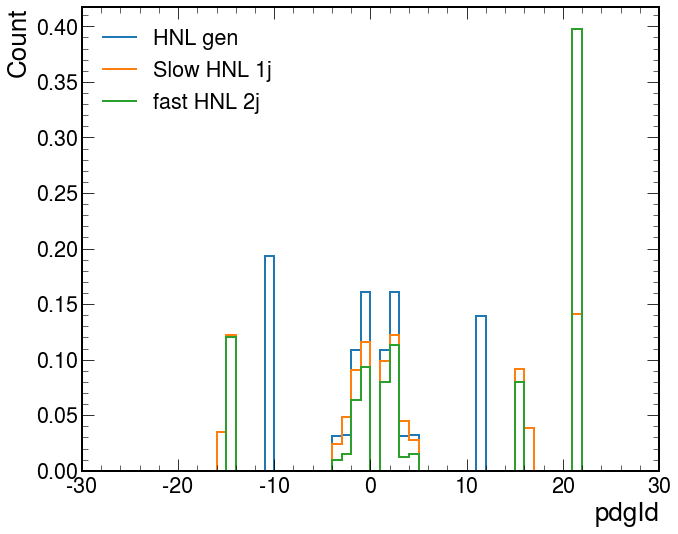

In [145]:
h = hist.Hist("Count",
              hist.Cat("Source","LHE partId"),
              hist.Bin("pdgId","pdgId",60,-30,30))

h.fill(Source="fast HNL 2j",pdgId= ak.flatten(lhe_TwoJet.pdgId))
h.fill(Source="Slow HNL 1j",pdgId= ak.flatten(lhe_OneJet.pdgId))       
h.fill(Source="HNL gen",pdgId= ak.flatten(lhe_oldSample.pdgId))
fig, ax = plt.subplots(figsize=(10,8))
hist.plot1d(h,overlay='Source',density=True,line_opts={"lw":2})
ax.legend(loc=2)
plt.tight_layout()

# ax.set_yscale("log");
# ax.set_ylim(1,None)
# ax.set_xlim(20,30)
# ax.set_xlim(-30,-20)

<AxesSubplot:xlabel='nGenJet', ylabel='Count'>

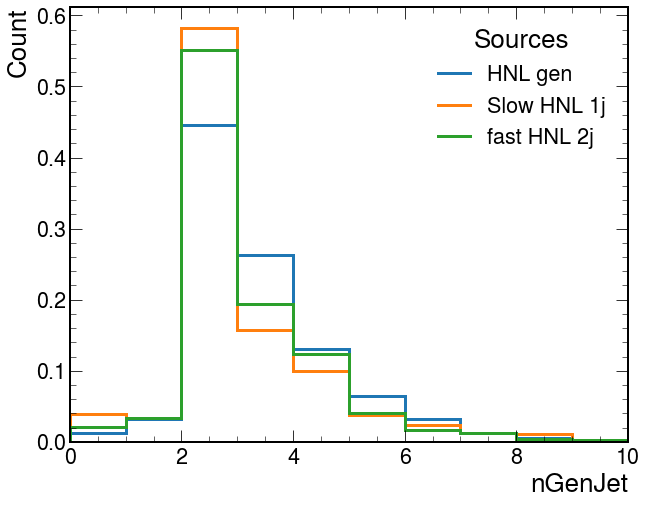

In [125]:
h = hist.Hist("Count",
              hist.Cat("Source","Sources"),
              hist.Bin("nGenJet","nGenJet",10,0,10))

h.fill(Source="fast HNL 2j",nGenJet= ak.num(TwoJet.GenJet))
h.fill(Source="Slow HNL 1j",nGenJet= ak.num(OneJet.GenJet))
h.fill(Source="HNL gen"    ,nGenJet= ak.num(OldSample.GenJet))

fig, ax = plt.subplots(figsize=(10,8))
hist.plot1d(h,overlay='Source',density=True,
            line_opts={"lw":3,"ls":"-"},
#                         error_opts={"marker":"+","lw":0}
           )

In [108]:
hep.__version__

'0.3.1'

In [106]:
hep.set_style("CMS")

(0.001, 0.2877)

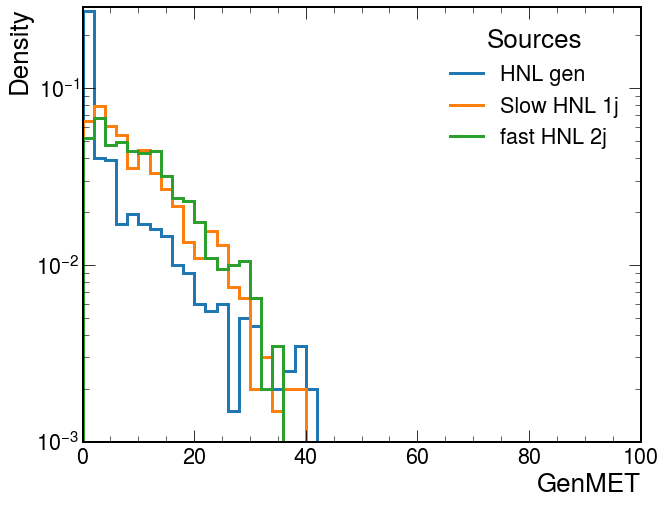

In [126]:
h = hist.Hist("Density",
              hist.Cat("Source","Source"),
              hist.Bin("GenMET","GenMET",50,0,100))

h.fill(Source="fast HNL 2j",GenMET= TwoJet.GenMET.pt)
h.fill(Source="Slow HNL 1j",GenMET= OneJet.GenMET.pt)
h.fill(Source="HNL gen"    ,GenMET= OldSample.GenMET.pt)

fig, ax = plt.subplots(figsize=(10,8))
hist.plot1d(h,overlay='Source',density=True,    line_opts={"lw":3,"ls":"-"},)
ax.set_yscale('log');ax.set_ylim(1e-3,None)

In [137]:
unique(gen_OldSample.pdgId)

array([ -20433,  -20423,  -20413,  -20313,  -20213,  -10323,  -10321,
        -10313,  -10311,   -4314,   -4312,   -4232,   -4224,   -4214,
         -4132,   -4122,   -4114,   -4112,   -3334,   -3324,   -3322,
         -3314,   -3312,   -3224,   -3222,   -3214,   -3212,   -3122,
         -3114,   -3112,   -2224,   -2214,   -2212,   -2114,   -2112,
         -1114,    -533,    -531,    -523,    -521,    -513,    -511,
          -433,    -431,    -423,    -421,    -415,    -413,    -411,
          -325,    -323,    -321,    -315,    -313,    -311,    -213,
          -211,     -24,     -16,     -15,     -14,     -13,     -12,
           -11,      -5,      -4,      -3,      -2,      -1,       1,
             2,       3,       4,       5,      11,      12,      13,
            14,      15,      16,      21,      22,      24,     111,
           113,     130,     211,     213,     221,     223,     310,
           311,     313,     315,     321,     323,     325,     331,
           333,     

In [166]:
def unique(a):
    return np.unique(ak.flatten(a,axis=None).to_numpy())

In [152]:
gen_OldSample[ak.any(abs(gen_OldSample.pdgId)==24,axis=1)]

<GenParticleArray [[GenParticle, ... GenParticle]] type='1000 * var * genParticle'>

In [153]:
gen_OneJet[ak.any(abs(gen_OneJet.pdgId)==24,axis=1)]

<GenParticleArray [[GenParticle, ... GenParticle]] type='967 * var * genParticle'>

In [154]:
gen_TwoJet[ak.any(abs(gen_TwoJet.pdgId)==24,axis=1)]

<GenParticleArray [[GenParticle, ... GenParticle]] type='1000 * var * genParticle'>

In [155]:
W = gen_OldSample[abs(gen_OldSample.pdgId)==24]

In [170]:
unique(W[W.statu].distinctParentIdxG)

array([      2,    2240,    2879,    4301,    5054,    5485,    7320,
          9620,   10687,   11457,   12365,   13840,   14997,   15743,
         17517,   18040,   18699,   19458,   20168,   21864,   23560,
         24035,   26041,   26565,   28093,   29016,   31084,   33140,
         34801,   35429,   36151,   36800,   38247,   40032,   41897,
         42727,   44451,   45305,   46784,   47892,   48065,   48523,
         49340,   49876,   51485,   53418,   55039,   55804,   57156,
         58067,   58645,   59896,   61900,   63685,   64800,   65643,
         67461,   67894,   68573,   69936,   71279,   72827,   74208,
         74668,   77120,   78767,   80654,   81146,   81773,   83221,
         83990,   85214,   87393,   89551,   90513,   92293,   93502,
         95189,   96621,   98260,   99620,  100784,  102461,  103420,
        104832,  105019,  105377,  106500,  108303,  109545,  110732,
        111807,  112775,  114960,  116156,  117680,  119115,  120135,
        120608,  121